In [32]:
import pandas as pd
import numpy as np
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
# 어떤 생선이 존재하는지 종만을 따로 출력

pd.unique(fish['Species'])


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [52]:
#이 때 Species열을 타깃으로 하고 나머지 5개열은 입력 데이터로 사용

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [53]:
fish_target = fish['Species'].to_numpy()

In [54]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [156]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [63]:
# 최근접이웃

from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))

0.8907563025210085 0.85


In [70]:
print(kn.classes_ )


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [71]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [74]:
# 네번째 샘플의 확률

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


Text(0, 0.5, 'phi')

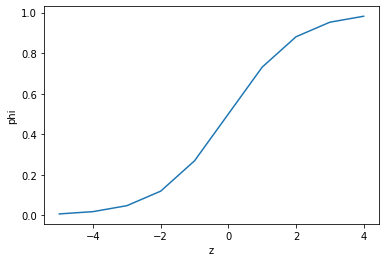

In [78]:
# 로지스틱 함수 그래프 그려보기

import numpy as np
import matplotlib.pyplot as plt 

z = np.arange(-5,5,1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')

In [144]:
# 불리언 인덱싱으로 행 선택하기
# 행과 열을 

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [109]:
## 불리언 인덱싱으로 행 선택하기 으로 도미와 빙어의 행을 골라내겠다.

bream_smelt_indexs = (train_target =='Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [110]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [136]:
# 각각의 확률을 보겠다.

lr.predict_proba(train_bream_smelt[:5])
#첫번째 열이 양성, 두번째 열이 음성
# 번호순이므로 첫번째 열은 0 즉, 음성
# 두번째 열은 1 즉, 양성이다.

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [123]:
# Smelt가 양성임을 알 수 있다.
lr.classes_   

array(['Bream', 'Smelt'], dtype=object)

In [127]:
# 회귀계수를 보자.
print(lr.coef_ , lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [129]:
# z값을 출력해보자.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [133]:
#이를 시그모이드 함수에 통과시켜보자.
# 여기서는 expit()을 사용하겠다.
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [145]:
#이를 predict_proba 와 비교해보면
lr.predict_proba(train_bream_smelt[:5])

# 즉 decision_funciton은 양성의 z값을 반환해주었다는 것을 알 수 있다.  

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [150]:
# 로지스틱으로 다중 분류 수행하기

lr = LogisticRegression(C=20 , max_iter = 1000)
lr.fit(train_scaled , train_target)
print( lr.score(train_scaled, train_target) , lr.score(test_scaled, test_target))


0.9327731092436975 0.925


In [158]:
# 상위 5개행 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [166]:
# 샘플 5개의 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])

np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [168]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [176]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [182]:
# z값을 소프트맥스에 통과시키기
from scipy.special import softmax
proba = softmax(decisions, axis = 1 )
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
